# **Importing Librairies**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# **EDA**

In [ ]:
df=pd.read_csv('/content/heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Features explanation:


*   ChestPainType : ASY=asymptomatic, ATA=atypical angina, NAP =non-anginal pain,TA= typical angina
*   RestingBP= Resting Blood Pressure in mm/hg
*   Cholesterol = it circulates in the blood
*   FastingBS = Fasting Blood Sugar
*   RestingECG = The resting electrocardiogram is a test that measures the electrical activity of the heart.
*   MaxHR = (maximum heart rate) it's the highest number of beats per minute your heart can pump under maximum stress.
*   ExerciceAngina = Exercise-Induced Angina :It frequently may occur with exercise or stress. 
*   Oldpeak = ST depression induced by exercise relative to rest
*   ST_Slope = Slope of the Peak Exercise ST segment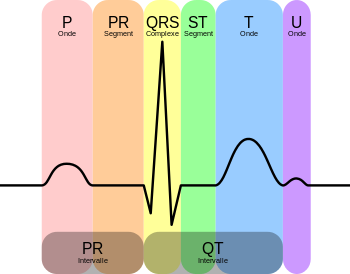
*   HeartDisease = The target










In [ ]:
df.shape

(918, 12)

In [ ]:
df.dtypes #return types bark

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.head(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1


In [ ]:
# awil 5 lignes fil data
df.head()
# ekhir 5 lignes
df.tail()
# ligne au hasard
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
829,29,M,ATA,130,204,0,LVH,202,N,0.0,Up,0


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# najmou nzidou include="object" li describe bch ntolou 3al colonnes li fehom texte
df.describe(include="object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [ ]:
# najem na3ref les valeurs uniques fi une colonne avec unique()
vals = df['ChestPainType'].unique()
# najem na3ref 9adeh min valeur unique que nunique()
nuni = df['ChestPainType'].nunique()
print("unique values : ",vals)
print( "number of unique values :",nuni)

unique values :  ['ATA' 'NAP' 'ASY' 'TA']
number of unique values : 4


In [ ]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [ ]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
TA_patients = df[ df['ST_Slope'] == "Down" ]


In [ ]:
TA_patients

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
247,48,M,ASY,122,275,1,ST,150,Y,2.0,Down,1
303,62,F,ASY,120,0,1,ST,123,Y,1.7,Down,1
307,53,M,ATA,130,0,0,ST,120,N,0.7,Down,0
309,57,M,ASY,95,0,1,Normal,182,N,0.7,Down,1
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
...,...,...,...,...,...,...,...,...,...,...,...,...
858,62,F,ASY,140,268,0,LVH,160,N,3.6,Down,1
879,48,M,ATA,110,229,0,Normal,168,N,1.0,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0


In [ ]:
# filtering li howa ya3ni raja3li il jme3a ili 3andhom haka wala haka

adults = df[ df['Age'] > 50 ]


In [ ]:
# filtering bou barcha conditions juste nzidou & (et) wala | (ou) mabinhom 
# w nhotou kol condition fi prenthèse
df[ (df['ST_Slope'] == "Up") & (df['Age'] >50 ) ]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
27,52,M,ATA,120,284,0,Normal,118,N,0.0,Up,0
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
29,51,M,ATA,125,188,0,Normal,145,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
893,57,M,ATA,154,232,0,LVH,164,N,0.0,Up,1
899,61,M,ASY,148,203,0,Normal,161,N,0.0,Up,1
903,56,M,ATA,130,221,0,LVH,163,N,0.0,Up,0
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##handling missing values 
- Deleting 
- Imputing the Missing Value


There are 2 ways one can delete the missing values:

1. Deleting the entire row

  If a row has many missing values then you can choose to drop the entire row.

2. Deleting the entire column

  If a certain column has many missing values then you can choose to drop the entire column.

for more information : https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/ 

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#Deleting the entire row
df = df.dropna(axis=0)

In [ ]:
#Deleting the entire column
#df = df.drop(['RestingECG'],axis=1)

In [ ]:
#Replace the missing value with random value for example '0' using 'fillna' method
df['Age'] = df['Age'].fillna(0)

#Replace the missing values for numerical columns with mean (the most obvious)
df['Age'] = df['Age'].fillna(df['Age'].mean())

#Median is the middlemost value. It’s better to use the median value for imputation in the case of outliers.
df['Age'] = df['Age'].fillna(df['Age'].median()) 

#Mode is the most frequently occurring value. It is used in the case of categorical features.
df['RestingECG'] = df['RestingECG'].fillna(df['RestingECG'].mode()) 

In [ ]:
# Check if there are any duplicates
df[ df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
#drop duplicated rows
df.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,174,N,0.0,Flat,1


# **Data Visualization**

let's change the labeling for better visualization and interpretation.

In [ ]:
df['HeartDisease'] = df.HeartDisease.replace({1: "Disease", 0: "No_disease"})
df.head(1)

# Heart Disease variable distribution



In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
name = df['Sex']
ax = sns.countplot(x='HeartDisease', data=df, palette='coolwarm')
ax.set_title("Target counts", fontsize = 13, weight = 'bold')



## There are more diseased than healthy patients.

# Age variable distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


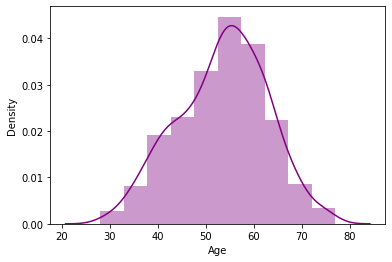

In [ ]:
sns.distplot(df['Age'],bins=10, hist=True, kde=True, color="purple")

Most of the diseased patients are aged between 50 and 60.

In [ ]:
df.Age.value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

Text(0, 0.5, 'Age distribution')

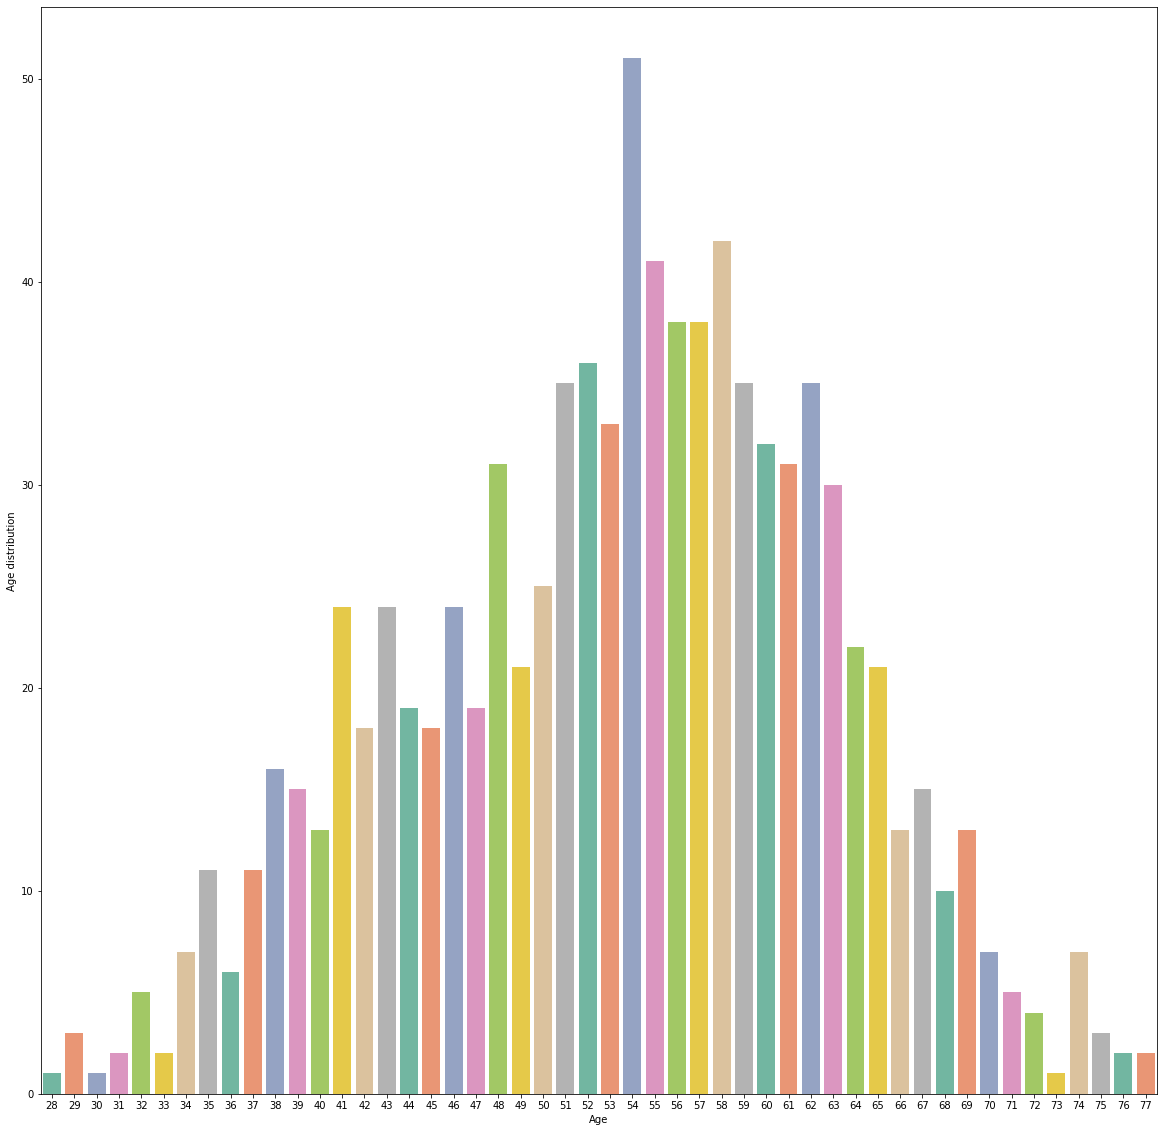

In [ ]:
plt.figure(figsize=(20, 20))
sns.barplot(
            x=df.Age.value_counts()[:50].index,
            y=df.Age.value_counts()[:50].values,
            palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

# Maximum Heart Rate distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


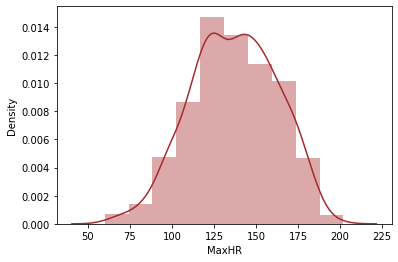

In [ ]:
sns.distplot(df['MaxHR'],bins=10, hist=True, kde=True, color="brown")

# Cholesterol variable disrtibution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


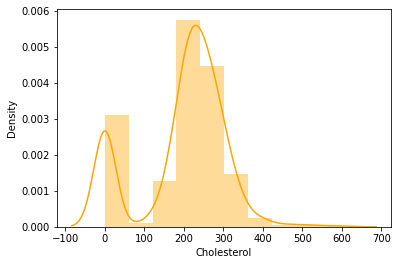

In [ ]:
sns.distplot(df['Cholesterol'],bins=10, hist=True, kde=True, color="orange")

# Resting blood pressure variable distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


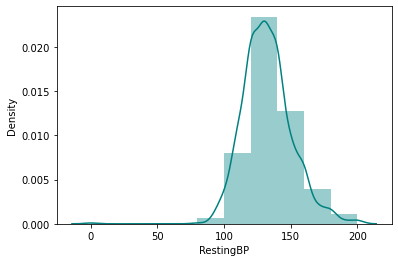

In [ ]:
sns.distplot(df['RestingBP'],bins=10, hist=True, kde=True, color="teal")

# Old peak variable distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


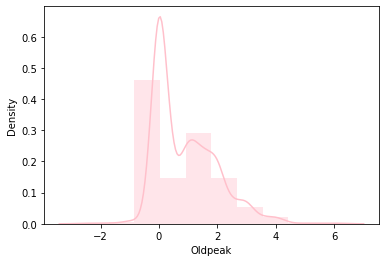

In [ ]:
	sns.distplot(df['Oldpeak'],bins=10, hist=True, kde=True, color="pink")

#let's use the Box plots 

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


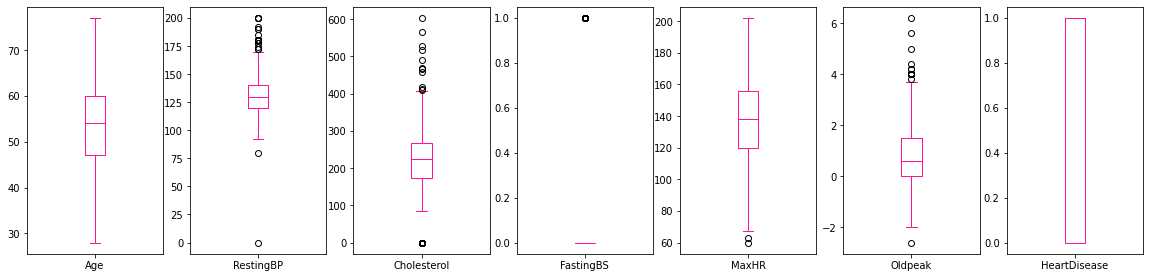

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');

As you can see, we have some outliers but these outliers hold useful informations. That's why we are going to keep them.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


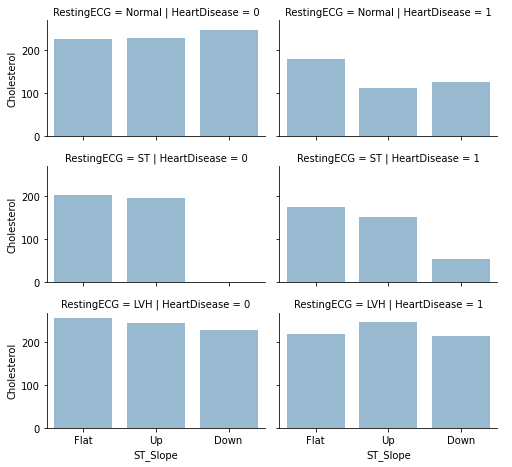

In [ ]:
grid = sns.FacetGrid(df, row="RestingECG", col="HeartDisease", size=2.2, aspect=1.6)
grid.map(sns.barplot, "ST_Slope", "Cholesterol", alpha=.5, ci=None)
grid.add_legend()

Text(0.5, 1.0, 'Sex Distribution according to Target')

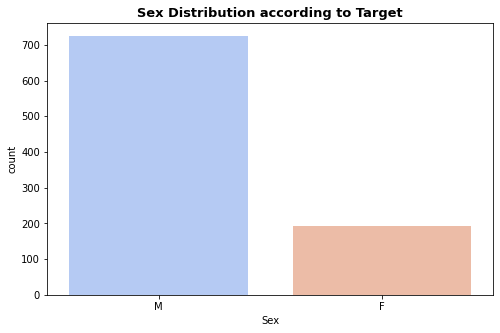

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
name = df['Sex']
ax = sns.countplot(x='Sex', data=df, palette='coolwarm')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')



Text(0.5, 1.0, 'Sex Distribution according to Target')

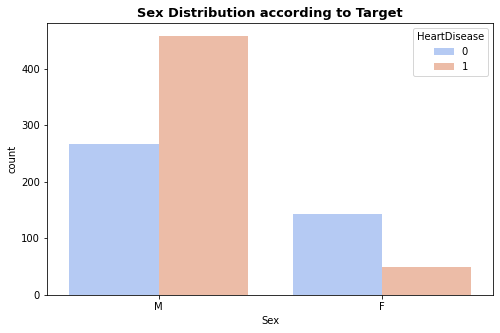

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
name = df['Sex']
ax = sns.countplot(x='Sex', hue='HeartDisease', data=df, palette='coolwarm')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')



Most diseased patients are males.

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['ChestPainType']
ax = sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='PiYG')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')


Most diseased patients have asymptomatic chest pain.

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['RestingECG']
ax = sns.countplot(x='RestingECG', hue='HeartDisease', data=df, palette='Set3')
ax.set_title("RestingECG Distribution according to Target", fontsize = 13, weight = 'bold')


Most diseased patients have normal resting ECG

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['FastingBS']
ax = sns.countplot(x='FastingBS', hue='HeartDisease', data=df, palette='Pastel2_r')
ax.set_title("FastingBS Distribution according to Target", fontsize = 13, weight = 'bold')

Most patients that have a fasting blood sugar = 1 are diseased.

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['ExerciseAngina']
ax = sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df, palette='Pastel2')
ax.set_title("Exercise Angina Distribution according to Target", fontsize = 13, weight = 'bold')

Most diseased patients have angina while exercising.

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['ST_Slope']
ax = sns.countplot(x='ST_Slope', hue='HeartDisease', data=df, palette='Pastel1')
ax.set_title("ST_Slope Distribution according to Target", fontsize = 13, weight = 'bold')

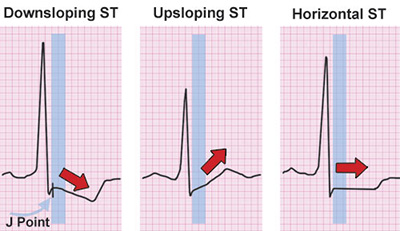

Most diseased patients have flat ST Slope

In [ ]:
import seaborn as sns
sns.pairplot(df, kind="scatter", hue="HeartDisease", palette="coolwarm_r")
plt.show()

Most diseased patients have a MaxHR under 125 and an oldpeak more than 2.

Let's transform the categorical values to numerical ones to see their correlation with our target.

In [ ]:
df['HeartDisease'] = df.HeartDisease.replace({ "Disease": 1, "No_disease": 0})
df['ChestPainType']=df.ChestPainType.replace({"ASY":0,"ATA":1,"NAP":2,"TA":3})
df['RestingECG']=df.RestingECG.replace({"Normal":0,"ST":1,"LVH":2})
df['ST_Slope']=df.ST_Slope.replace({"Flat":0,"Up":1,"Down":2})
df['ExerciseAngina']=df.ExerciseAngina.replace({"N":0,"Y":1})
df.head(1)

In [ ]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Pastel1")
plt.title('Correlation Between Variables', fontsize = 30)
plt.show()

Age, Resting Blood Pressure, Fasting Blood Sugar, old peak and Exercice-induced angina have a positive correlation with our target.
While cholesterol, Maximum heart rate, ST slope, cholesterol and chest type pain have a negative correlation with our target.

In [ ]:
sns.jointplot(x=df["Age"], y=df["MaxHR"], kind='hex', marginal_kws=dict(bins=30, fill=True))
plt.show()

There is a negative correlation between Age and Maximum heart rate.

In [ ]:
sns.histplot(data=df, x="RestingBP", color="skyblue", label="RestingBP", kde=True)
sns.histplot(data=df, x="MaxHR", color="pink", label="MaxHR", kde=True)
plt.legend() 
plt.show()

Resting BP and MaxHR distributions together.

## **Now that we have visualized our data, let's try all the ML algorithms in order to choose the best that fits our data.**

# **Logistic Regression**

In [ ]:
x = df[['Age', 'Oldpeak','RestingBP','FastingBS','MaxHR','Cholesterol','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]
y = df['HeartDisease']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

logreg = LogisticRegression() 
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

We have 73 true positive values and 118 true negative values.

The ROC curve.

In [ ]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,color='darkorange',label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **KNN**

Let's choose the best K value :

In [ ]:
error_rate = []

for i in range(1,50):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Best K value = 10

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10) 
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Accuracy=',accuracy_score(y_pred,y_test))

# **Decision Tree Prediction**

In [ ]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   
y_pred=tree.predict(x_test)   
print("Accuracy:{}".format(accuracy_score(y_test, y_pred)))

# **Random Forest**

In [ ]:
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Random Forest and logistic regression have the best accuracy. They are the best algorithms for our data.